# Import

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
# 標準化處理
def standardize(data):
    mean = np.mean(data)
    std = np.std(data)
    standardized_data = (data - mean) / std
    return standardized_data

# 移動平均處理
def moving_average(data, window_size=2):
    smoothed_data = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return smoothed_data

# Read excel

In [101]:
# excel
xl = 'stk-2024-07-09.xlsx'
stock_data = pd.read_excel(xl)

In [102]:
display(stock_data.info())
stock_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7524 non-null   int64  
 1   date              7524 non-null   object 
 2   stock_id          7524 non-null   int64  
 3   Trading_Volume    7524 non-null   int64  
 4   Trading_money     7524 non-null   int64  
 5   open              7524 non-null   float64
 6   max               7524 non-null   float64
 7   min               7524 non-null   float64
 8   close             7524 non-null   float64
 9   spread            7524 non-null   float64
 10  Trading_turnover  7524 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 646.7+ KB


None

,Unnamed: 0,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
7519,7519,2024-07-03,2331,3078036,101519575,32.80,33.25,32.80,32.95,0.30,1608
7520,7520,2024-07-04,2331,4767228,158660016,33.25,33.55,33.00,33.25,0.30,2205
7521,7521,2024-07-05,2331,16150517,558199838,33.45,35.15,33.45,34.95,1.70,7941
7522,7522,2024-07-08,2331,6636115,228813311,35.20,35.20,34.10,34.30,-0.65,4852
7523,7523,2024-07-09,2331,5642184,189228439,34.35,34.50,33.05,33.20,-1.10,4606


## standardize

In [103]:
std_stock_data = stock_data.apply(lambda x: standardize(x) if pd.api.types.is_any_real_numeric_dtype(x) else x, axis=0)
std_stock_data.drop(columns=['Unnamed: 0', 'stock_id'], inplace=True)
std_stock_data

,date,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,1994-09-24,-0.717771,-0.469740,0.749335,0.716216,0.784754,0.751672,2.410647,-0.743277
1,1994-09-26,-0.717255,-0.469096,0.859348,0.823936,0.897278,0.861804,2.410647,-0.741525
2,1994-09-27,-0.698539,-0.444840,0.983113,0.945121,1.023867,0.985704,2.713044,-0.700349
3,1994-09-29,-0.378176,-0.002718,1.106878,1.066307,1.150456,1.109603,2.713044,-0.058174
4,1994-09-30,-0.499163,-0.179994,1.106878,1.066307,1.009802,0.971937,-3.032493,-0.241277
...,...,...,...,...,...,...,...,...,...
7519,2024-07-03,-0.320727,-0.229781,-0.053761,-0.058024,-0.036669,-0.048168,0.172912,-0.039776
7520,2024-07-04,-0.102691,-0.094555,-0.041384,-0.049945,-0.031043,-0.039908,0.172912,0.221737
7521,2024-07-05,1.366626,0.850979,-0.035884,-0.006857,-0.018384,0.006898,1.019623,2.734367
7522,2024-07-08,0.138539,0.071467,0.012247,-0.005510,-0.000099,-0.010998,-0.401642,1.381244


In [104]:
data = std_stock_data.copy()
df_ma = data.apply(lambda x: moving_average(x, 1) if pd.api.types.is_any_real_numeric_dtype(x) else x, axis=0)
df_ma

,date,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,1994-09-24,-0.717771,-0.469740,0.749335,0.716216,0.784754,0.751672,2.410647,-0.743277
1,1994-09-26,-0.717255,-0.469096,0.859348,0.823936,0.897278,0.861804,2.410647,-0.741525
2,1994-09-27,-0.698539,-0.444840,0.983113,0.945121,1.023867,0.985704,2.713044,-0.700349
3,1994-09-29,-0.378176,-0.002718,1.106878,1.066307,1.150456,1.109603,2.713044,-0.058174
4,1994-09-30,-0.499163,-0.179994,1.106878,1.066307,1.009802,0.971937,-3.032493,-0.241277
...,...,...,...,...,...,...,...,...,...
7519,2024-07-03,-0.320727,-0.229781,-0.053761,-0.058024,-0.036669,-0.048168,0.172912,-0.039776
7520,2024-07-04,-0.102691,-0.094555,-0.041384,-0.049945,-0.031043,-0.039908,0.172912,0.221737
7521,2024-07-05,1.366626,0.850979,-0.035884,-0.006857,-0.018384,0.006898,1.019623,2.734367
7522,2024-07-08,0.138539,0.071467,0.012247,-0.005510,-0.000099,-0.010998,-0.401642,1.381244


,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
count,7.524000e+03,7524.000000,7.524000e+03,7524.000000,7.524000e+03,7.524000e+03,7.524000e+03,7.524000e+03
mean,2.266484e-17,0.000000,6.043957e-17,0.000000,6.043957e-17,-6.043957e-17,-5.194026e-18,-3.777473e-17
std,1.000066e+00,1.000066,1.000066e+00,1.000066,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00
min,-7.177712e-01,-0.469740,-8.244026e-01,-0.817183,-8.248974e-01,-8.204742e-01,-9.080426e+00,-7.432773e-01
25%,-5.485929e-01,-0.406487,-5.831988e-01,-0.581814,-5.838153e-01,-5.823120e-01,-1.899641e-01,-5.373959e-01
50%,-3.043701e-01,-0.303850,-3.652353e-01,-0.366373,-3.658006e-01,-3.661764e-01,-8.526107e-03,-3.082980e-01
75%,1.641168e-01,-0.040317,-2.075675e-02,-0.021332,-1.697711e-02,-2.201137e-02,1.729119e-01,1.482550e-01
max,2.045259e+01,14.707253,5.644919e+00,5.563629,5.707667e+00,5.597515e+00,8.458580e+00,2.556049e+01


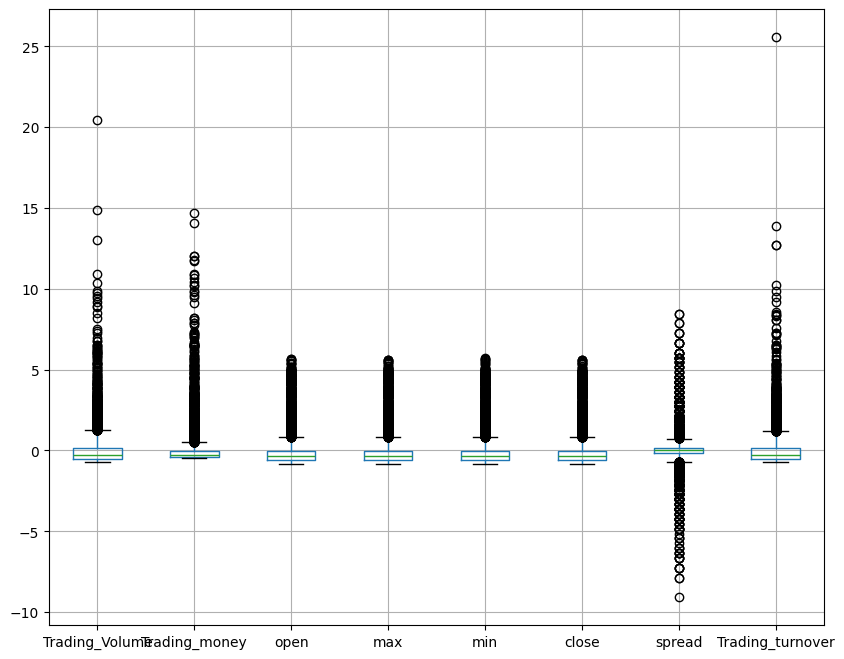

In [105]:
display(df_ma.describe())
df_ma.boxplot(figsize=(10,8))
plt.show()

In [106]:
data_set = df_ma.copy()
data_set = data_set.drop(columns=['date'])

time_steps = 30

X = []
Y = []

for i in range(time_steps, len(data_set)):
     X.append(data_set.iloc[i-time_steps:i].values)
     Y.append(data_set.iloc[i]['close'])

X = np.array(X)
Y = np.array(Y)

# 分割訓練集和測試集
split_index = int(len(X) * 0.8)
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]
x_train.shape

(5995, 30, 8)

In [107]:
model = Sequential()
model.add(keras.layers.LSTM(units=50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mse')

d:\Projects\python\DS\stock\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2337 - val_loss: 5.7699e-04
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 4.3767e-04
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - val_loss: 3.5225e-04
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 3.8053e-04
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - val_loss: 2.8561e-04
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - val_loss: 2.8356e-04
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - val_loss: 3.6393e-04
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - val_loss: 2.4033e-04
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - val_loss: 3.4506e-04
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - val_loss: 3.0429e-04


In [109]:
evaluate = model.evaluate(x_test, y_test)
evaluate

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9014e-04


0.0005098460824228823

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


'MES:0.07885567515168683'

'RMSE:0.28081252670008655'

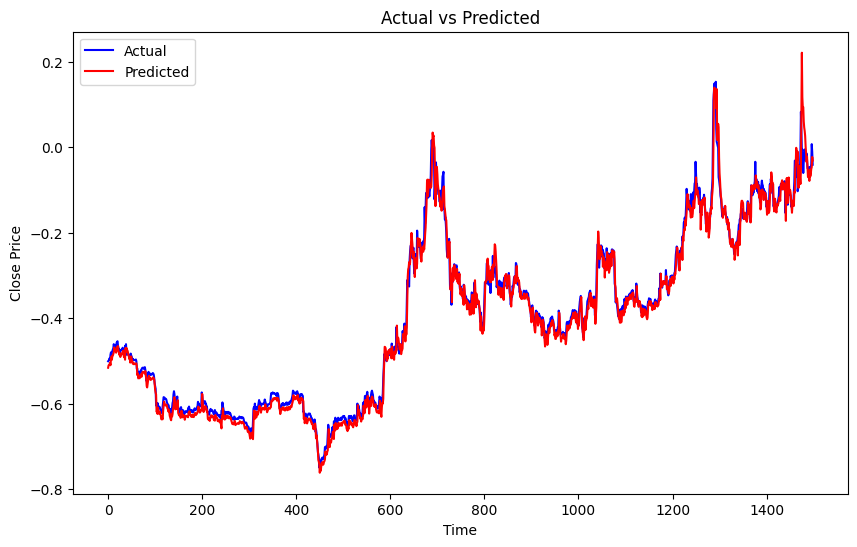

In [110]:
predict = model.predict(x_test)

mse = np.mean(((predict - y_test)**2))
display(f"MES:{mse}")
display(f"RMSE:{np.sqrt(mse)}")

plt.figure(figsize=(10,6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(predict, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [111]:
data_set2 = stock_data.sort_values(by='date', ascending=False).head(1000)
display(data_set2.head())
data_set2 = data_set2.drop(columns=['Unnamed: 0', 'date', 'stock_id'])
data_set2 = data_set2.apply(lambda x: standardize(x) if pd.api.types.is_any_real_numeric_dtype(x) else x, axis=0)
data_set2 = data_set2.apply(lambda x: moving_average(x, 1) if pd.api.types.is_any_real_numeric_dtype(x) else x, axis=0)

X = []
Y = []

for i in range(time_steps, len(data_set2)):
     X.append(data_set2.iloc[i-time_steps:i].values)
     Y.append(data_set2.iloc[i]['close'])

X = np.array(X)
pre = model.predict(X)

,Unnamed: 0,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
7523,7523,2024-07-09,2331,5642184,189228439,34.35,34.50,33.05,33.20,-1.10,4606
7522,7522,2024-07-08,2331,6636115,228813311,35.20,35.20,34.10,34.30,-0.65,4852
7521,7521,2024-07-05,2331,16150517,558199838,33.45,35.15,33.45,34.95,1.70,7941
7520,7520,2024-07-04,2331,4767228,158660016,33.25,33.55,33.00,33.25,0.30,2205
7519,7519,2024-07-03,2331,3078036,101519575,32.80,33.25,32.80,32.95,0.30,1608


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


'MES:1.6409740848378689'

'RMSE:1.281005107264553'

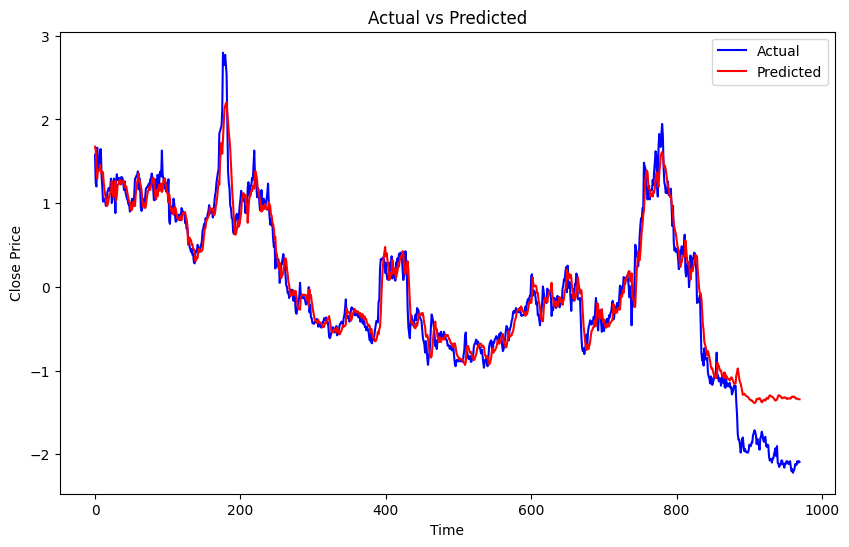

In [112]:
mse = np.mean(((pre - Y)**2))
display(f"MES:{mse}")
display(f"RMSE:{np.sqrt(mse)}")

plt.figure(figsize=(10,6))
plt.plot(Y, color='blue', label='Actual')
plt.plot(pre, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [113]:
close_data = stock_data.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset)*.95))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)
train_data = scaled_data[:training, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7088, 60, 1)

In [114]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

d:\Projects\python\DS\stock\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential_8, built=True>>

In [115]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0043
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0017
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0013
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0016
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0016
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0011
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 9.9071e-04
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0012
Epoch 9/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0010
Epoch 10/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0010


In [116]:
test_data = scaled_data[training-60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

mse = np.mean(((predict - y_test)**2))
display(f"MES:{mse}")
display(f"RMSE:{np.sqrt(mse)}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


'MES:1.0056929623079764'

'RMSE:1.0028424414173827'

In [117]:
train = stock_data[:training]
test = stock_data[training:]
test['Predict'] = predict

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close']) 
plt.plot(test['date'], test[['close', 'Predict']]) 
plt.title('Stock Close Price') 
plt.xlabel('date') 
plt.ylabel("close") 
plt.legend(['Train', 'Test', 'Predict']) 

C:\Users\GS75\AppData\Local\Temp\ipykernel_20912\2733432594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predict'] = predict
